In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [2]:
base_path= '/home/mr-arthor/Desktop/CDAC/Practical_Machine_Learning/Lab_Work/Datasets'
df_diabtes = pd.read_csv(base_path+'/Diabetes.csv')


In [3]:
df_loan_application = pd.read_csv(base_path+'/Loan Eligibility Prediction.csv')



In [4]:
df_Customer_churn = pd.read_csv(base_path+'/TelecomCustomerChurn.csv')


In [5]:

bank_marketing = fetch_ucirepo(id=222) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
df_Marketing = pd.concat([X, y], axis=1)


In [6]:
df_HR = pd.read_csv(base_path+'/HR50k.csv')


In [7]:
df_Cancer = pd.read_csv(base_path+'/Cancer.csv')


In [8]:
df_OnlineRetail = pd.read_excel(base_path+'/Online Retail.xlsx')


In [9]:
# df_CreditCard = pd.read_csv(base_path+'/CreditCard.csv')
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
df_Student = pd.concat([X, y], axis=1)


In [10]:
df_election = pd.read_csv(base_path+'/presidential_polls.csv')


In [11]:
df_Bank = df_Marketing


In [12]:
df_Youtube = pd.read_csv(base_path+'/YouTube Spam.csv')


In [13]:
def eda(df,target): #Exploratory Data Analysis 
    for col in df.select_dtypes(include=['object']).columns:
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
    print(df.head())
    print(df.cov())
    
    # sns.pairplot(df)
    # x = df.iloc[:, :q]
    # y = df.iloc[:, q]
    x=df.drop(columns=[target])
    y=df[target]

    print(x.head())
    print(y.head())
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)    
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    print(x_train)
    print(x_test)
    return x_train, x_test, y_train, y_test  


In [14]:
arr = np.arange(1, 10)


In [15]:
parameter={'penalty':['l1','l2','elasticnet'],'C':arr,'max_iter':[100,200,300]}


In [16]:
def Logr(x_train, x_test, y_train, y_test, parameter,CV):
    classifier=LogisticRegression(max_iter=500)
    classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=CV)
    classifier_regressor.fit(x_train,y_train)
    # print('Best Parameters:',classifier_regressor.best_params_)
    y_pred=classifier_regressor.predict(x_test)
    print('Accuracy:',accuracy_score(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    # print(cm)
    ConfusionMatrixDisplay(cm).plot()
    # print('accuracy_score:',accuracy_score(y_test,y_pred))
    
    return y_pred, cm


In [17]:
x_train, x_test, y_train, y_test = eda(df=df_diabtes,target='diabetes')    


   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
             pregnancies      glucose   diastolic     triceps       insulin  \
pregnancies    11.354056    13.947131    9.214538   -4.390041    -28.555231   
glucose        13.947131  1022.248314   94.430956   29.239183   1220.935799   
diastolic       9.214538    94.430956  374.647271   64.029396    198.378412   
triceps        -4.390041    29.239183   64.029396  254.473245    802.979941   
insulin       -28.555231  1220.935799  198.378412  802.979941  13281.180078 

Accuracy: 0.8246753246753247


/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/linear_model/_logisti

(array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([[98,  9],
        [18, 29]]))

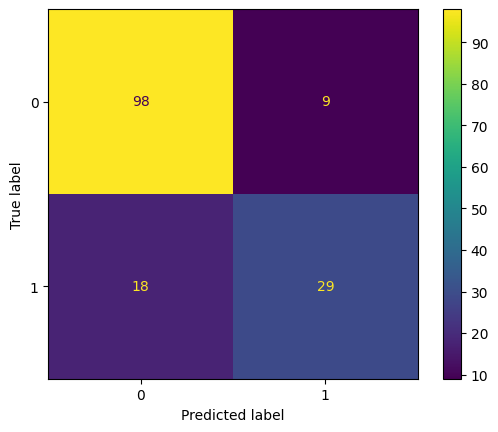

In [18]:
Logr(x_train, x_test, y_train, y_test, parameter,CV=6)


In [19]:
df_loan_application.isnull().sum()


Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
x_train, x_test, y_train, y_test = eda(df_loan_application,'Loan_Status' )


   Customer_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          569       0        0           0          0              0   
1           15       1        1           2          0              0   
2           95       1        0           0          1              0   
3          134       1        1           0          0              1   
4          556       1        1           1          0              0   

   Applicant_Income  Coapplicant_Income  Loan_Amount  Loan_Amount_Term  \
0              2378                 0.0            9               360   
1              1299              1086.0           17               120   
2              3620                 0.0           25               120   
3              3459                 0.0           25               120   
4              5468              1032.0           26               360   

   Credit_History  Property_Area  Loan_Status  
0               1              2            0  
1               1   

Accuracy: 0.8130081300813008


/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/linear_model/_logisti

(array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]),
 array([[14, 19],
        [ 4, 86]]))

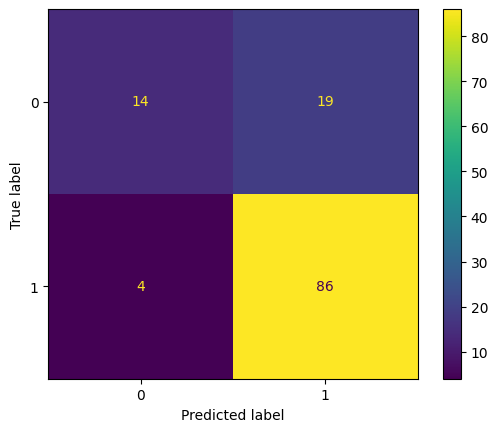

In [21]:

Logr(x_train, x_test, y_train, y_test, parameter,CV=6)


In [22]:
df_Customer_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
x_train, x_test, y_train, y_test = eda(df_Customer_churn,'Churn' )


   customerID  Gender  SeniorCitizen  Partner  Dependents  Tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                0               0  ...   
1             1              0                0               1  ...   
2             1              0                0               1  ...   
3             0              0                0               1  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


Accuracy: 0.794889992902768


/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/linear_model/_logisti

(array([0, 0, 0, ..., 0, 0, 0]),
 array([[940, 101],
        [188, 180]]))

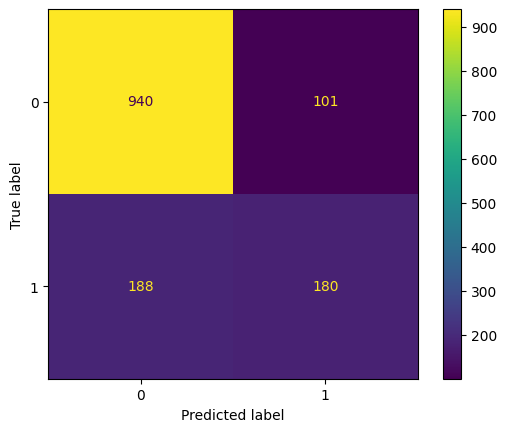

In [24]:
Logr(x_train, x_test, y_train, y_test, parameter,CV=6)


In [25]:
df_Marketing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [26]:
x_train, x_test, y_train, y_test = eda(df_Marketing,'y' )


   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  y  
0            5      8       261         1     -1         0         3  0  
1            5      8       151         1     -1         0         3  0  
2            5      8        76         1     -1         0         3  0  
3            5      8        92         1     -1         0         3  0  
4            5      8       198         1     -1         0         3  0  
                     age         job   marital   education    default  \
age           112.75

Accuracy: 0.8882008183125069


/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/linear_model/_logisti

(array([0, 1, 0, ..., 0, 0, 0]),
 array([[7802,  178],
        [ 833,  230]]))

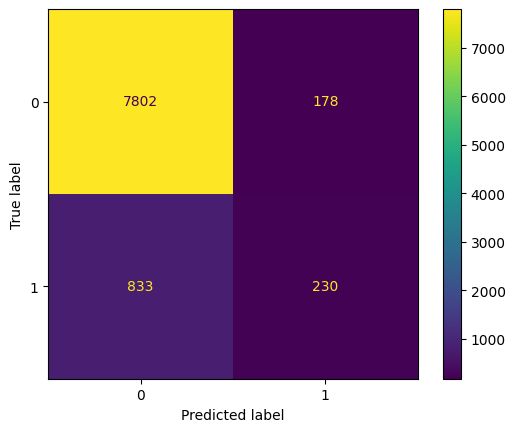

In [27]:
Logr(x_train, x_test, y_train, y_test, parameter,CV=6)


In [28]:
df_HR.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,31,No,Non-Travel,158,Software,7,3,Medical,1,1,...,1,80,2,15,1,2,12,4,10,11
1,38,No,Travel_Rarely,985,Human Resources,33,5,Life Sciences,1,2,...,3,80,4,5,4,3,1,1,1,1
2,59,Yes,Non-Travel,1273,Sales,5,2,Technical Degree,1,3,...,2,80,2,9,5,1,6,6,4,3
3,52,Yes,Travel_Rarely,480,Support,2,5,Marketing,1,4,...,2,80,2,22,4,4,10,9,5,6
4,32,No,Non-Travel,543,Human Resources,7,5,Human Resources,1,5,...,4,80,2,30,3,4,29,27,9,7


In [29]:
df_Cancer.isnull().sum()   
df_Cancer.drop(['Unnamed: 32'], axis=1, inplace=True)


In [30]:
x_train, x_test, y_train, y_test = eda(df_Cancer,'diagnosis' )


         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

Accuracy: 0.9649122807017544


/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/linear_model/_logisti

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0]),
 array([[65,  2],
        [ 2, 45]]))

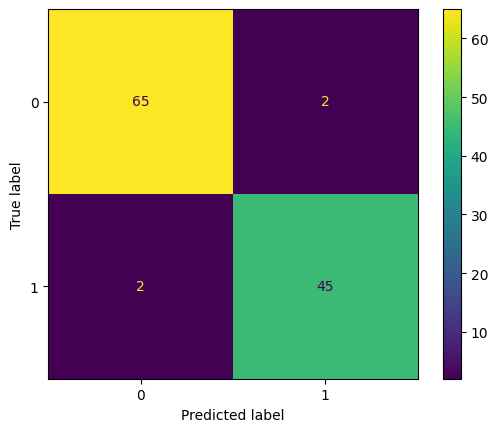

In [31]:
Logr(x_train, x_test, y_train, y_test, parameter,CV=6)


In [32]:
df_OnlineRetail.isnull().sum()
df_OnlineRetail.dropna(inplace=True)
df_OnlineRetail.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [33]:
# x_train, x_test, y_train, y_test = eda(df_OnlineRetail,'CustomerID' )


In [34]:
df_election.isnull().sum()
# df_election.dropna(inplace=True)
df_election.drop(['adjpoll_mcmullin','adjpoll_mcmullin','multiversions']  , axis=1, inplace=True)


In [35]:
df_election.dropna(inplace=True)


In [36]:
df_election.isnull().sum()


cycle               0
branch              0
type                0
matchup             0
forecastdate        0
state               0
startdate           0
enddate             0
pollster            0
grade               0
samplesize          0
population          0
poll_wt             0
rawpoll_clinton     0
rawpoll_trump       0
rawpoll_johnson     0
rawpoll_mcmullin    0
adjpoll_clinton     0
adjpoll_trump       0
adjpoll_johnson     0
url                 0
poll_id             0
question_id         0
createddate         0
timestamp           0
dtype: int64

In [37]:
x_train, x_test, y_train, y_test = eda(df_election,'rawpoll_clinton' )


     cycle  branch  type  matchup  forecastdate  state  startdate  enddate  \
102   2016       0     2        0             0      0          8       12   
120   2016       0     2        0             0      0          5        9   
129   2016       0     2        0             0      0          6        6   
134   2016       0     2        0             0      0          1        2   
156   2016       0     2        0             0      0          3        5   

     pollster  grade  ...  rawpoll_johnson  rawpoll_mcmullin  adjpoll_clinton  \
102         6      4  ...              7.0              26.0         28.71826   
120         0      3  ...              4.0              30.0         22.92762   
129         5      3  ...              4.0              29.0         28.19793   
134         8      1  ...              7.0              20.0         19.80207   
156         1      1  ...              5.0              31.0         23.36361   

     adjpoll_trump  adjpoll_johnson  url  po

In [38]:
# Logr(x_train, x_test, y_train, y_test, parameter,CV=6)


In [39]:
df_Student.isnull().sum()
df_Student.drop(['G2','G1'], axis=1, inplace=True)


In [40]:
x_train, x_test, y_train, y_test = eda(df_Student,'G3' )


   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  \
0         0         0       4         3      4     1     1       3         4   
1         1         0       5         3      3     1     1       3         2   
2         1         0       4         3      2     2     3       3         6   
3         1         1       3         2      2     1     1       5         0   
4         0         0       4         3      2     1     2       5         0   

   G3  
0  11  
1  11  
2  12  
3  14  
4  1

/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, yo

Accuracy: 0.18461538461538463


(array([ 9, 11, 11, 13,  9,  8, 12, 15, 12, 16, 14, 11, 12, 17, 17, 15, 12,
        14, 11,  9, 12, 14, 17, 13, 14, 17, 11, 17, 13, 12, 13, 12,  9, 12,
        11,  8, 10, 14, 11, 10, 11, 10, 11, 15, 16, 11, 15, 12, 12, 14, 10,
        15, 11, 11,  8, 11, 13, 11, 15, 11, 15,  8, 14,  9, 14, 13, 15, 13,
        12, 14, 11, 16, 11, 13, 13, 12, 15, 12, 17, 13, 13, 12,  9, 14, 16,
        13, 11, 15,  0, 12, 10, 15, 12, 11, 10, 10, 14, 13, 11, 15, 14, 12,
         8, 12, 11, 10, 13, 11, 11, 16, 11, 13, 15, 15, 15, 10, 10, 16, 11,
        10, 11, 11, 17, 10, 12, 14, 15, 17,  0, 10]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 4, 2, 6, 2, 1, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 4, 5, 3, 2, 2, 1, 1, 1, 0],
        [0, 0, 0, 1, 0, 3, 4, 2, 3, 2, 3, 1, 0, 0]

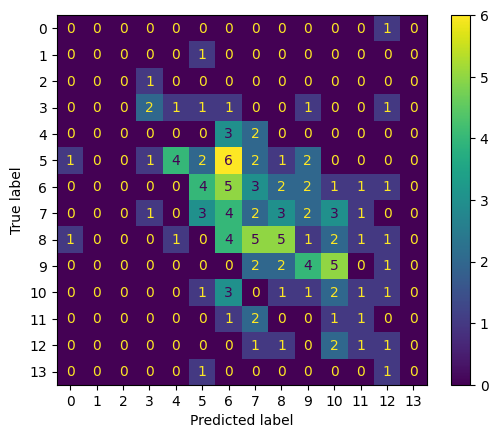

In [41]:
Logr(x_train, x_test, y_train, y_test, parameter,CV=6)


In [42]:
df_Bank.isnull().sum()


age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [43]:
x_train, x_test, y_train, y_test = eda(df_Bank,'y' )


   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  y  
0            5      8       261         1     -1         0         3  0  
1            5      8       151         1     -1         0         3  0  
2            5      8        76         1     -1         0         3  0  
3            5      8        92         1     -1         0         3  0  
4            5      8       198         1     -1         0         3  0  
                     age         job   marital   education    default  \
age           112.75

Accuracy: 0.8882008183125069


/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/linear_model/_logisti

(array([0, 1, 0, ..., 0, 0, 0]),
 array([[7802,  178],
        [ 833,  230]]))

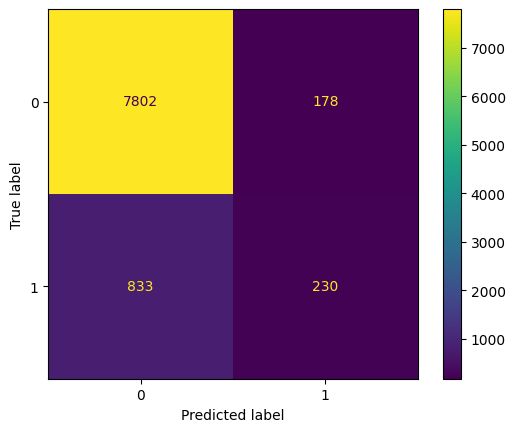

In [44]:
Logr(x_train, x_test, y_train, y_test, parameter,CV=6)


In [45]:

df_Youtube.isnull().sum()
df_Youtube.dropna(inplace=True)
df_Youtube.shape


(1709, 5)

In [46]:
x_train, x_test, y_train, y_test = eda(df_Youtube,'CLASS' )


   COMMENT_ID  AUTHOR  DATE  CONTENT  CLASS
0           0     606   199      424      1
1           7    1266   200      364      1
2           3     385   201     1358      1
3        1279     355   202     1389      1
4        1191     467   203     1515      1
               COMMENT_ID         AUTHOR           DATE        CONTENT  \
COMMENT_ID  243443.670275    -793.297391   80247.574665     473.215812   
AUTHOR        -793.297391  215748.304075   -4987.732317    1546.493335   
DATE         80247.574665   -4987.732317  242963.958698   -5241.352039   
CONTENT        473.215812    1546.493335   -5241.352039  200701.929826   
CLASS          -19.519205      -5.121554     -92.804595     -21.578071   

                CLASS  
COMMENT_ID -19.519205  
AUTHOR      -5.121554  
DATE       -92.804595  
CONTENT    -21.578071  
CLASS        0.247087  
   COMMENT_ID  AUTHOR  DATE  CONTENT
0           0     606   199      424
1           7    1266   200      364
2           3     385   201     1358

Accuracy: 0.5730994152046783


/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/linear_model/_logisti

(array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

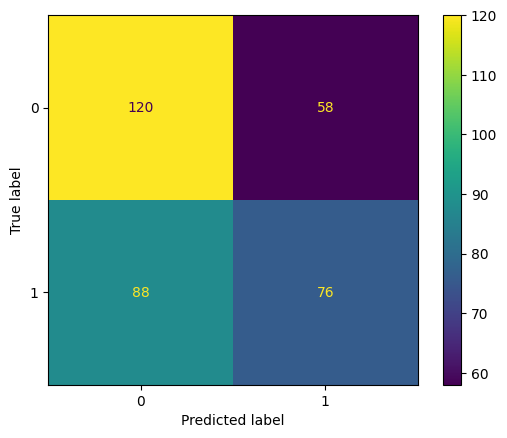

In [47]:
Logr(x_train, x_test, y_train, y_test, parameter,CV=6)
